# 인구 데이터 기반 소득 예측 경진대회

이번 대회는 인구 데이터 바탕으로 소득이 5만달러 이하인지 초과인지 분류하는 대회입니다.

분류 해야할 클래스는 5만달러 이하인지 초과인지 수입(target)을 총 두가지로 분류하는 대회입니다.

EDA에 앞서 데이터의 구성과 결측치를 확인하겠습니다.


## 데이터 불러오기

먼저 분석하려는 데이터를 작업장으로 가져오는 작업이 필요합니다.

이를 위해서 파이썬 라이브러리 중 하나인 Pandas를 이용합니다.

pandas 라이브러리는 엑셀과 같은 행과 열로 이루어진 테이블(table) 형식의 데이터를 편하게 다루도록 해주는 라이브러리입니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

train = pd.read_csv('data/train.csv')
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


In [20]:
train.shape

(17480, 16)

총 17480행과 16열을 가진 데이터 입니다.

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [21]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


결측치가 존재하는군요!  
그럼 실제로 결측치의 데이터를 살펴보겠습니다.

In [3]:
# 결측치가 있는 row들을 확인합니다.
train[train.isna().sum(axis=1) > 0]

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
15081,15081,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
15082,15082,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
15083,15083,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,1
15084,15084,51,NaN,172175,Doctorate,16,Never-married,NaN,Not-in-family,White,Male,0,2824,40,United-States,1
15085,15085,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


결측치 데이터가 범주형인지 수치형인지 unique() 메소드를 통하여 확인하겠습니다.

In [23]:
print(train['workclass'].unique())
print(train['occupation'].unique())
print(train['native.country'].unique())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]


모두 데이터 값이 범주형이고  
결측치들에 대해서 어떤 특별한 패턴은 보이지 않으므로  
범주형 데이터에 대해서는 행을 삭제해주겠습니다. 

In [24]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

train = handle_na(train, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(train)           

결측치가 존재하지 않습니다


In [25]:
train.shape

(15081, 16)

총 16열과 15081행을 가진 데이터가 되었습니다.   
시각화를 위하여 보기 좋게 target이 0인 데이터를 <=50K으로, 1인 데이터를 >50K으로 표기하여 진행하겠습니다.

In [4]:
train['target'] = train['target'].apply(lambda x : '<=50K' if x == 0 else '>50K' )

In [5]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


## 클래스 분포 확인

이번 과제는 5만달러 이하인지 초과인지 수입(target)을 분류하는 대회입니다.

두가지 클래스의 값들이 얼마나 존재하는지 확인해보겠습니다.

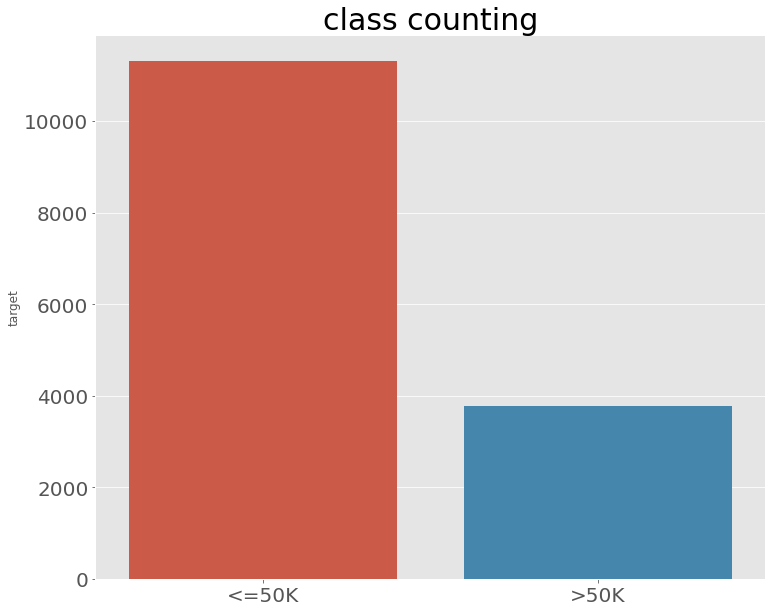

In [26]:
counted_values = train['target'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)
value_bar_ax.tick_params(labelsize=20)

위에 그래프에서와 같이 이번 대회는 데이터 불균형이 심한 편입니다.

소득이 5만달러 이하인 데이터 값이 훨씬 많군요.

data를 증강시키거나 적은 양의 클래스를 따로 맞추는 모델을 만들어보는 등의 시도를 해볼 수 있을 것 같습니다.


## 클래스별 특성

두가지 클래스 각각에서 고유 특성이 있을까요?

50K 미만인 그룹과 초과의 그룹을 feature 별로 비교해 시각화하여 특성을 관찰해보겠습니다

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  object
dtypes: int64(7), object(9)
memory usage: 2.0+ MB


info() 메소드를 활용하여 데이터의 특성을 보면 범주형 변수가 많으므로

우선적으로 범주형 변수의 특성을 살펴보겠습니다.

## 범주형 피쳐 데이터 시각화

범주형 피쳐만을 가진 데이터 프레임을 생성해주겠습니다.

In [28]:
train_categori = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week'],axis = 1) #범주형이 아닌 피쳐 drop
train_categori.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,<=50K


그럼 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'

총 8개의 범주형 피쳐와 분류해야할 라벨인 'target'을 남겨둔 데이터프레임이 생성되었습니다.

이제 target 에서 50k 초과인 피쳐들의 막대그래프와 50k 이하인 피쳐들의 막대 그래프를 그려 시각화로 비교해 보겠습니다.

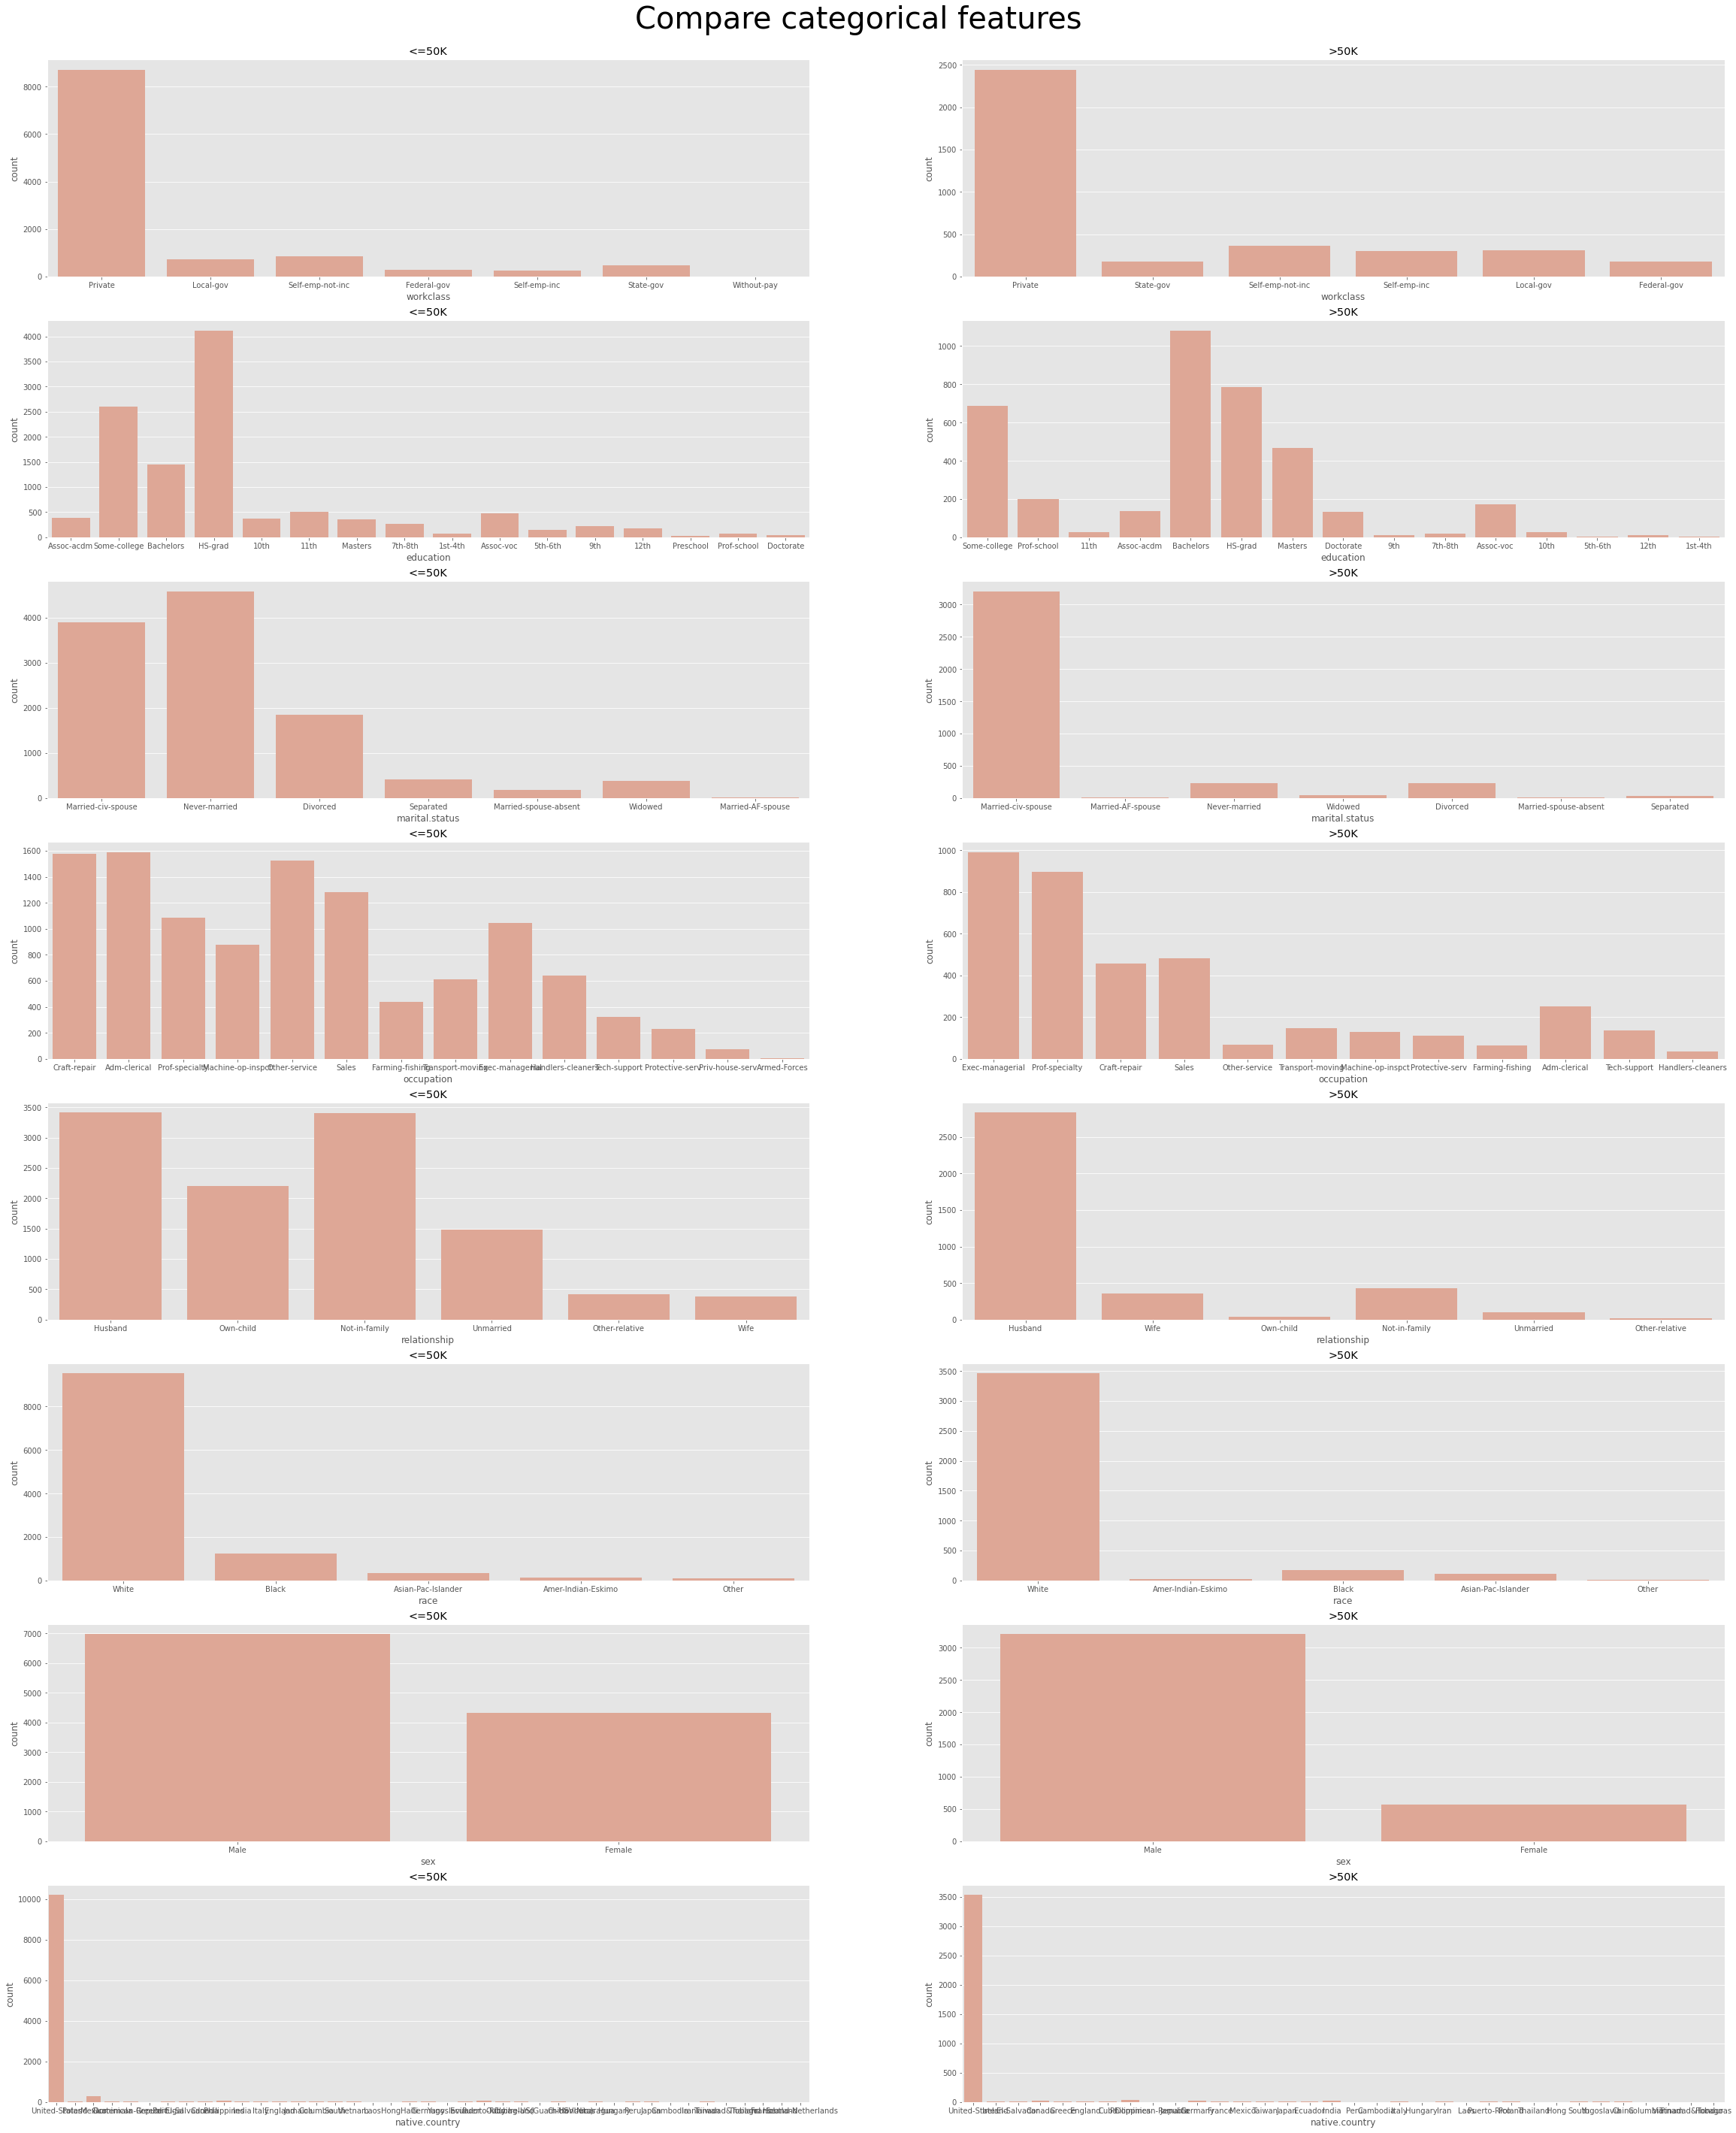

In [29]:
# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    sns.countplot(train_categori.columns[num], data= train_categori[train_categori['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['target'].unique()[i], k)
        j = j+1
    k = k+1

education 그래프를 보면 <=50k 에선 HS-grad가 가장 많은 반면 >50k에서는 Bachelors가 가장 많고 

막대그래프의 분포가 확연하게 차이 나는 것을 볼 수 있습니다. 

마찬가지로 marital.status, occupation, relationship 또한  분포의 차이가 심한 것을 알 수 있습니다.

따라서 education,  marital.status, occupation, relationship 피쳐에서 각  종류에 따라 수입의 영향이 많이 미칠 것이라고 예상이 됩니다.

## 수치형 피쳐 데이터 시각화

이제 수치형 피쳐의 데이터를 살펴보겠습니다.

우선적으로 수치형 피쳐만을 가진 데이터 프레임을 생성해주겠습니다.

In [30]:
train_numeric = train[['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_numeric.head()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week,target
0,32,309513,0,0,40,<=50K
1,33,205469,0,0,40,>50K
2,46,149949,0,0,40,<=50K
3,23,193090,0,0,30,<=50K
4,55,60193,0,0,40,<=50K


수치형의 특성을 잘 파악하기 위하여 피쳐의 통계치를 알아보겠습니다.

pandas의 DataFrame은 describe이라는 메소드를 통해 각 컬럼의 평균값, 최대치, 최소치, 편차 등을 산출해 봅시다.

In [31]:
train_numeric.describe()

,age,fnlwgt,capital.gain,capital.loss,hours.per.week
count,15081.000000,1.508100e+04,15081.000000,15081.000000,15081.000000
mean,38.455673,1.897891e+05,1105.202772,85.466415,40.920828
std,13.158095,1.051112e+05,7489.760601,397.661418,12.018513
min,17.000000,1.882700e+04,0.000000,0.000000,1.000000
25%,28.000000,1.177460e+05,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,0.000000,0.000000,40.000000
75%,47.000000,2.381880e+05,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,99999.000000,4356.000000,99.000000


이제 이 통계치와 데이터 이용하여 50k 초과인 피쳐와 50k 이하인 피쳐들의 분포 특성을 시각화를 하여 알아보겠습니다.

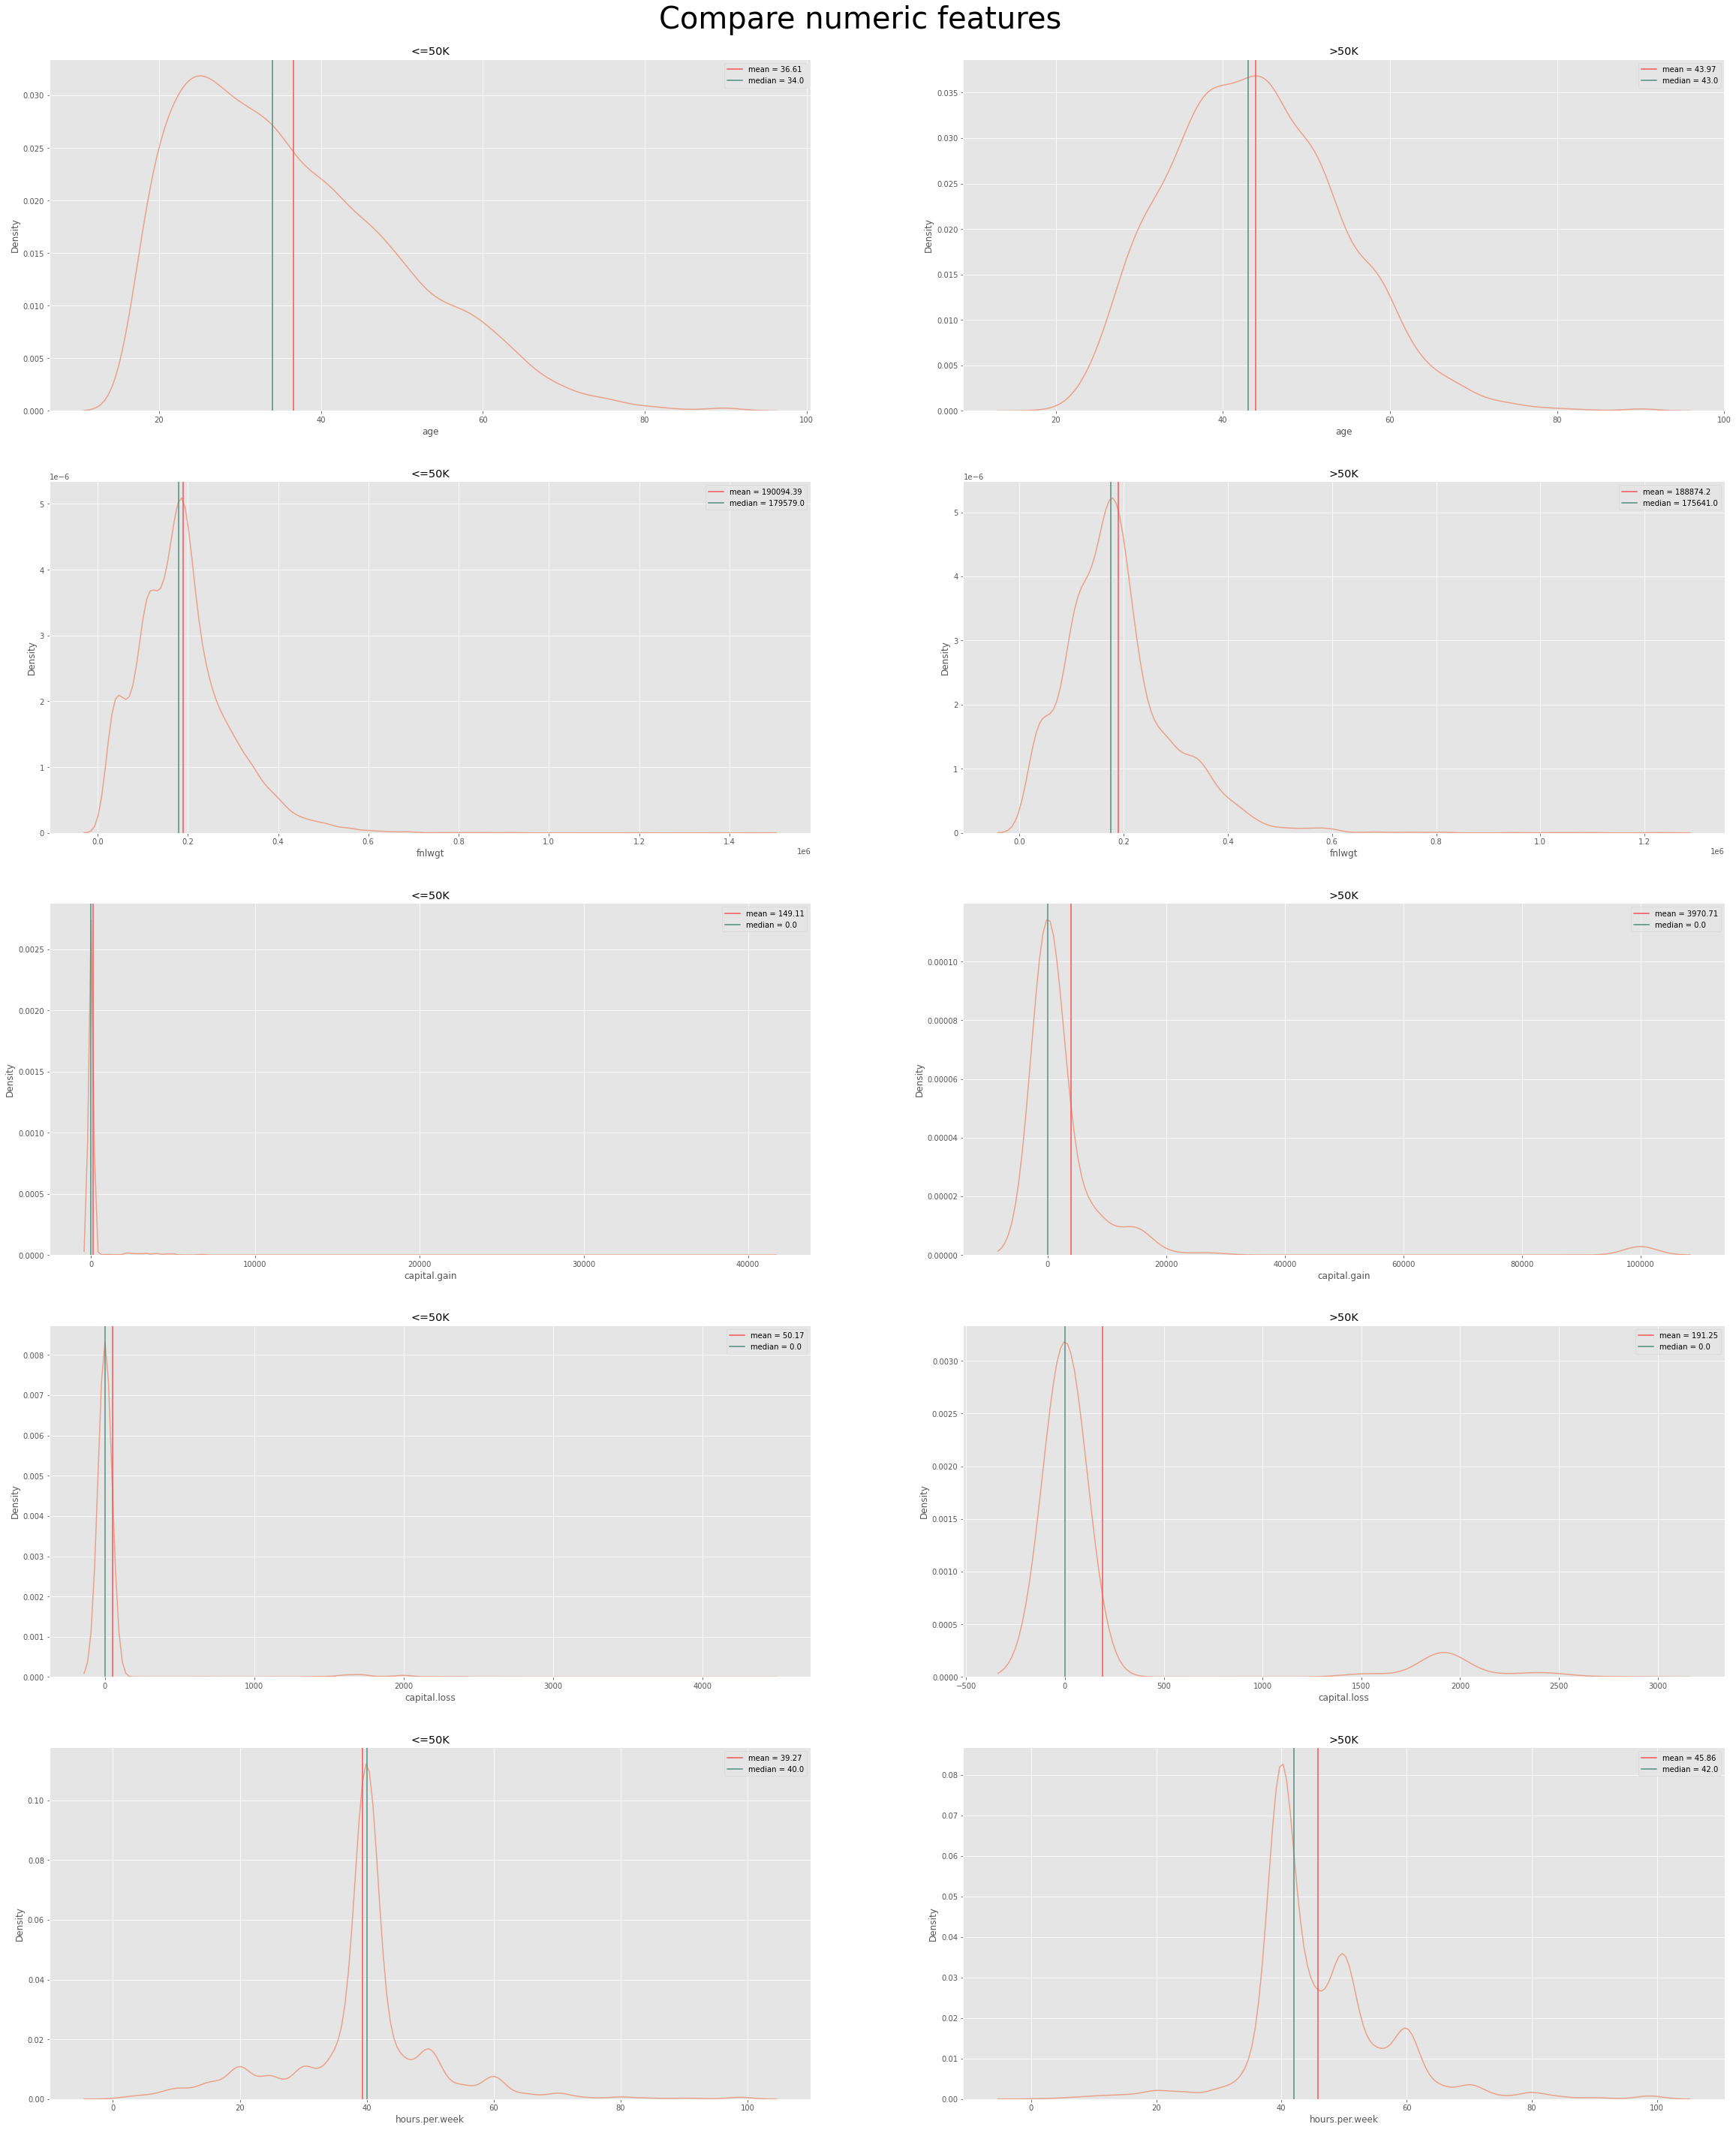

In [32]:
# 수치형 데이터 분포 
def visualize(axx, field, num):
    line = train_numeric[train_numeric['target'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['target'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['target'].unique()[i], k)
        j = j+1
    k = k+1

age 그래프를 보면 

<=50k 에 비하여  >50k에서 나이가 더 많은 분포 형상을 뛰고 있습니다. 

또한 mean값을 살펴보면 capital.gain, capital.loss, hours.per.week가 >50k에서 더 높은 수치를 가지고 있는 것을 확인 할 수 있습니다.

따라서 age, capital.gain, capital.loss, hours.per.week 피쳐에서 수치가 클수록 수입의 영향이 많이 미칠 것이라고 예상이 됩니다.

## 상관관계

그렇다면 영향이 많이 미치는 피쳐들의 상관관계 분포를 알아보겠습니다.

산포도 그래프를 통하여 시각화를 해봅시다.

x축을 capital.gain, y축을 hours.per.week로 두어 시각화를 해봅시다.

<AxesSubplot:title={'center':'capital gain and working time'}, xlabel='capital.gain', ylabel='hours.per.week'>

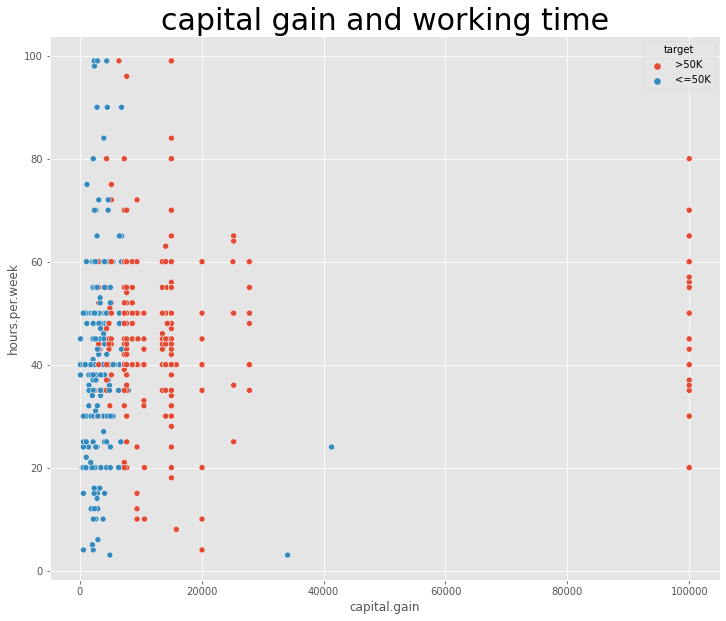

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'capital.gain',  y= 'hours.per.week', hue= 'target', data= train[train['capital.gain'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.gain에서 0값을 제외

x축에서 capital.gain이 커질수록 >50k 가 많은 것을 확인할 수 있고,

y축에서 크게 차이나보이진 않지만 대체적으로 hours.per.week가 적은쪽에 분포가 <=50k가 많이 형성되어있음을 볼 수 있습니다.

따라서 근무시간 많고 자본의 이익이 많은 집합이 수입이 많을 것이라고 예측이 됩니다.

또한 capital.gain 10만단위대 극단값이 모두 수입이 >50k 인 것을 확인 할 수 있습니다.

다음으로 x축을 age, y축을 capital.loss로 두어 시각화를 해봅시다.


<AxesSubplot:title={'center':'capital gain and working time'}, xlabel='age', ylabel='capital.loss'>

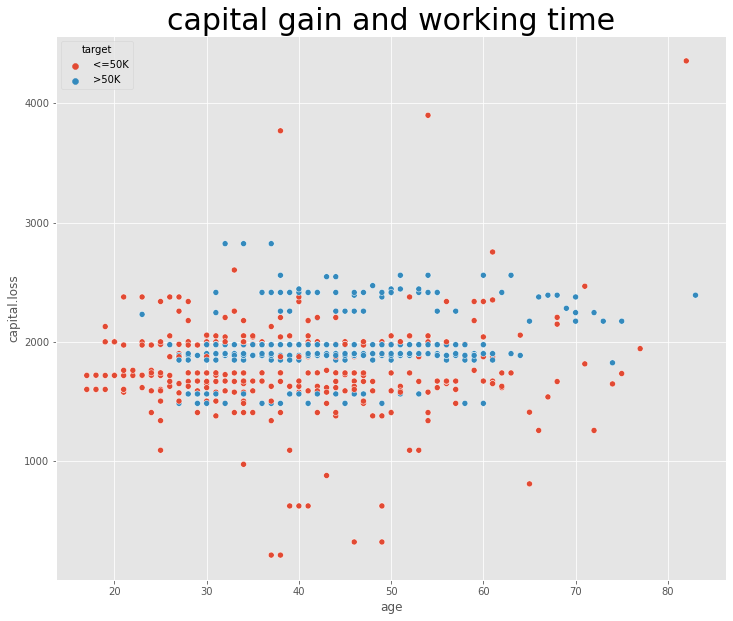

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('capital gain and working time', fontsize = 30)
sns.scatterplot(x = 'age',  y= 'capital.loss', hue= 'target', data= train[train['capital.loss'] > 0]) #산포도를 확실하게 차이나도록  시각화 해주기 위하여 capital.loss에서 0값을 제외

x축에서 age가 25세 미만이거나 65세 이상인 곳의 분포가 <=50k가 많이 형성되어있음을 볼 수 있습니다.

y축에서 capital.loss 적은 곳에 <=50k 가 많은 것을 확인할 수 있고, 

따라서 나이가 25세~65세 사이와 자본의 손실이 많은 집합이 수입이 많을 것이라고 예측이 됩니다.

또한 capital.loss가 2000이거나 2000바로 아래에 >50K인 집합이 loss 두드러지게 많이 형성되어 있고,  
그 아래 1700 부근에 <=50K가 두드러지게 많이 형성되어 있는 것을 확인할 수 있습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!